# Here we use the library face_recognition to find face in pictures, build on dlib

In [42]:
import face_recognition
import cv2
import glob
import os

import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
paths = glob.glob("../data/raw/face_recognition/*/*", recursive=True)

In [128]:
paths

['../data/raw/face_recognition/owen_grady/00000010.jpg',
 '../data/raw/face_recognition/owen_grady/00000004.jpg',
 '../data/raw/face_recognition/owen_grady/00000005.jpg',
 '../data/raw/face_recognition/owen_grady/00000007.jpg',
 '../data/raw/face_recognition/owen_grady/00000013.jpg',
 '../data/raw/face_recognition/owen_grady/00000012.jpg',
 '../data/raw/face_recognition/owen_grady/00000006.jpg',
 '../data/raw/face_recognition/owen_grady/00000002.jpg',
 '../data/raw/face_recognition/owen_grady/00000016.jpg',
 '../data/raw/face_recognition/owen_grady/00000017.jpg',
 '../data/raw/face_recognition/owen_grady/00000003.jpg',
 '../data/raw/face_recognition/owen_grady/00000015.jpg',
 '../data/raw/face_recognition/owen_grady/00000001.jpg',
 '../data/raw/face_recognition/owen_grady/00000029.jpg',
 '../data/raw/face_recognition/owen_grady/00000000.jpg',
 '../data/raw/face_recognition/owen_grady/00000014.jpg',
 '../data/raw/face_recognition/owen_grady/00000070.jpg',
 '../data/raw/face_recognition/

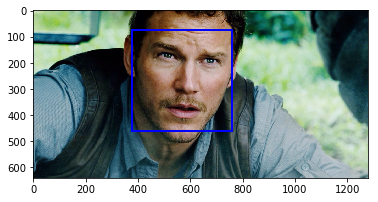

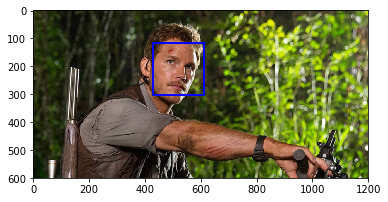

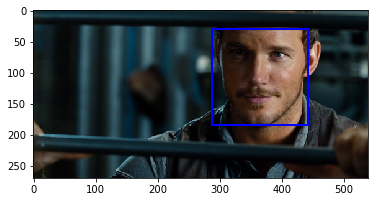

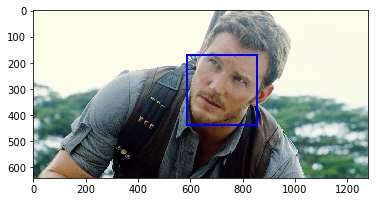

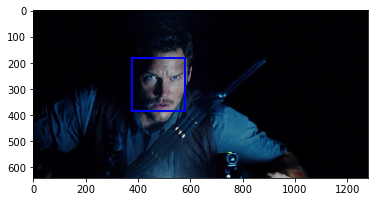

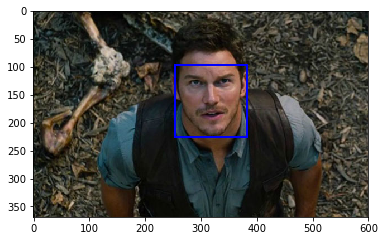

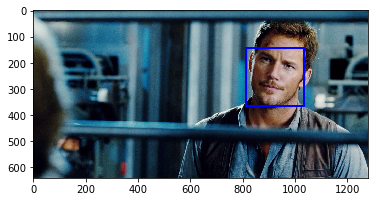

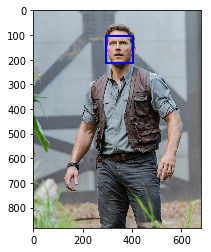

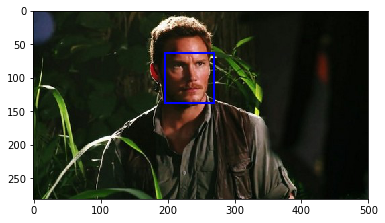

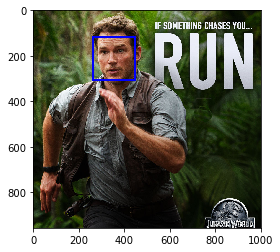

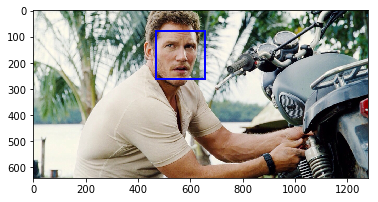

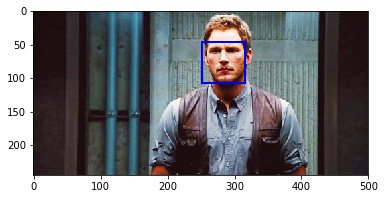

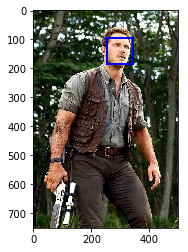

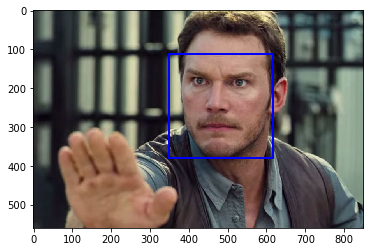

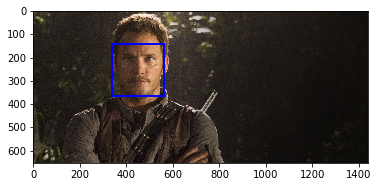

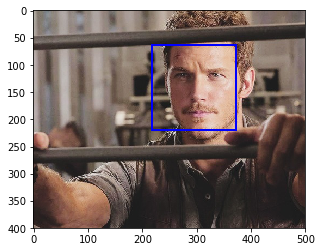

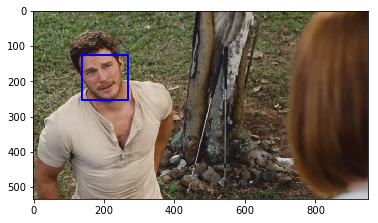

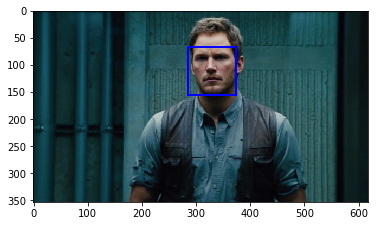

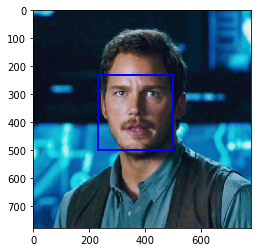

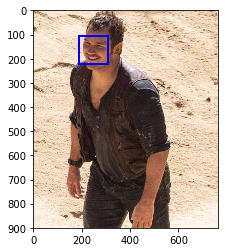

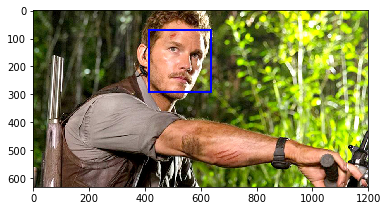

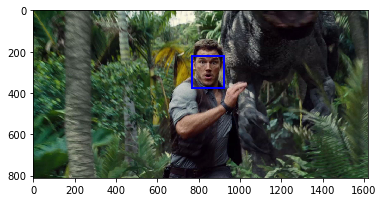

KeyboardInterrupt: 

In [126]:
lencodings, lnames = [], []
for (i, path) in enumerate(paths):
    name = path.split(os.path.sep)[-2]
    image = cv2.imread(path)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_boxes = face_recognition.face_locations(rgb, model="hog")
    if len(face_boxes) == 0:
        face_boxes = face_recognition.face_locations(rgb, model="cnn")
    xy = (face_boxes[0][-1], face_boxes[0][0])
    width = face_boxes[0][1] - face_boxes[0][-1]
    height = face_boxes[0][2] - face_boxes[0][0]
    fig,ax = plt.subplots(1)
    ax.imshow(rgb)
    rect = patches.Rectangle(xy, width, height,linewidth=2,edgecolor='b',facecolor='none')
    ax.add_patch(rect)
    plt.show()
    encodings = face_recognition.face_encodings(rgb, face_boxes)
    for encoding in encodings:
        lencodings.append(encoding)
        lnames.append(name)
data = {"encodings": lencodings, "names": lnames}

In [127]:
face_recognition.face_encodings?

In [ ]:
f = open("../models/enc.pickle", "wb")
f.write(pickle.dumps(data))
f.close()